# Imports

In [130]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import math

# Task 1. Data retrieving

## Read data

In [131]:
# reads data from csv file, processes it and drops all NaN rows
def process_data(file_name: str, value_column: str) -> pd.DataFrame:
    df = pd.read_csv(file_name)
    df = df[df['Year'] >= 1960]
    df = df.pivot_table(values=value_column, index='Entity', columns='Year')
    df.dropna(how='all', inplace=True)
    return df

In [132]:
gdp = process_data('data/gdp.csv', 'GDP Per Person')
gdp

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Entity,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10522.6670,10711.4670,11106.7690,10646.3250,11079.8090,11644.7920,11674.5890,12126.5230,12267.3120,12531.7880
Algeria,10835.0130,9263.0250,5283.8633,5965.9473,6087.3784,6427.3530,5564.5327,6055.4470,6584.9880,7002.0760,...,14808.7670,15523.8920,14968.8090,14278.2150,13804.1400,12512.0070,11854.6040,11408.4860,11773.6420,11787.4920
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6834.3700,8334.1100,9143.0570,9320.8920,9460.2020,8058.7270,7581.5454,7718.8564,7588.6620,7159.5790
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28403.2440,27989.9220,25566.4550,21739.5920,20429.6370,17478.2070,15636.5130,13414.3250,10206.0050,15177.9230
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21019.0880,21799.5640,21588.5430,19078.6050,9101.8590,16416.9240,16229.5690,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,7649.2573,7612.7695,7885.2563,8175.0830,8764.6330,8758.5590,8513.0110,8517.9520,9180.1330,9391.7350,...,18995.2540,20668.7970,20962.3930,19802.1170,12935.4580,NaN,NaN,NaN,NaN,NaN
Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4761.2383,5130.7324,5392.9650,5611.0522,5941.9670,6180.3580,6368.6510,6841.6543,7217.9240,7506.8170
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4891.9120,4239.4440,3917.6182,3906.5862,3739.2190,2533.9111,2023.4292,1429.1655,1755.3173,1777.2511


In [133]:
health_expenditure = process_data('data/health_expenditure.csv', 'Health Expenditure')
health_expenditure

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Entity,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.474,2.605,2.617,2.755,2.842,2.762,2.878,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.144,6.264,6.361,6.853,5.619,6.644,5.965,5.954,NaN,NaN
Australia,1.913670,2.092822,2.231257,2.141681,2.149825,2.223114,2.182398,2.019532,2.190541,2.304547,...,5.859,5.685,6.658,6.985,6.942,6.991,7.009,7.361,7.612,NaN
Austria,2.635009,2.660758,2.703673,2.780921,2.729423,2.841003,2.875335,3.098496,2.995499,3.175743,...,7.617,7.612,7.673,7.678,7.657,7.686,7.724,7.865,8.772,9.555
Belgium,1.683308,1.707128,1.730949,1.850051,1.699188,2.358219,2.405860,2.358219,2.540842,2.723465,...,8.033,8.040,8.079,8.265,8.305,8.304,8.337,8.107,8.491,NaN
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.356,3.556,3.709,3.861,3.952,3.959,3.897,3.930,NaN,NaN
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.845,4.057,4.493,4.148,4.128,4.222,4.330,4.295,5.353,NaN
Canada,2.099349,2.239906,2.380463,2.521021,2.661578,2.802135,3.135508,3.468881,3.802254,4.135627,...,7.410,7.368,7.241,7.591,7.688,7.574,7.577,7.641,9.701,8.695
Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.212,4.419,4.602,4.878,4.983,5.454,5.524,5.656,6.354,5.834


In [134]:
life_expectancy = process_data('data/life_expectancy.csv', 'Life Expectancy')
life_expectancy

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,32.5346,33.0681,33.5471,34.0162,34.4942,34.9528,35.4531,35.9240,36.4183,36.9101,...,61.9230,62.4167,62.5451,62.6587,63.1361,63.0160,63.0810,63.5645,62.5751,61.9824
Africa,41.4816,41.8692,42.3208,42.7767,43.2464,43.4401,43.4330,43.6456,44.1023,44.3156,...,59.8106,60.2924,60.7463,61.1288,61.5880,61.9858,62.3435,62.6880,62.2342,61.6609
Albania,54.4389,55.6340,56.6711,57.8445,58.9832,60.0187,60.9983,61.9716,62.9461,63.9226,...,78.0640,78.1226,78.4075,78.6441,78.8602,79.0473,79.1838,79.2825,76.9893,76.4626
Algeria,40.5322,40.5162,39.3230,42.9084,42.7879,42.7140,42.5429,42.5675,42.6422,42.7814,...,74.2024,74.6153,75.1100,75.6220,75.7318,75.7428,76.0656,76.4742,74.4528,76.3767
American Samoa,64.7270,65.4575,65.8623,65.9236,66.3083,66.3283,58.7703,66.2072,66.1682,66.4046,...,72.3202,72.2683,72.3403,72.5220,72.3712,72.4830,72.4915,72.3023,72.4432,72.5398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,38.5705,38.9285,39.3011,39.6733,40.0438,40.4071,40.7560,41.1068,41.4335,41.7772,...,68.2703,68.6511,68.9796,69.2957,69.5923,69.8544,70.0924,70.3129,70.5218,70.7804
World,47.6972,50.3587,53.1245,53.5761,54.1638,53.8924,54.4720,54.9203,55.4860,55.8286,...,70.8725,71.2072,71.5649,71.8004,72.1102,72.3267,72.5759,72.7897,72.0361,71.0479
Yemen,33.6785,34.0983,33.6147,33.2471,34.7378,35.3730,36.0969,36.8662,37.7957,39.4742,...,67.3429,67.5451,67.3842,65.8734,66.0641,65.9573,64.5751,65.0917,64.6501,63.7534


In [135]:
years_of_schooling = process_data('data/years_of_schooling.csv', 'Years Of Schooling')
years_of_schooling

Year,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Entity,,,,,,,,,,,,,
Afghanistan,0.390000,0.440000,0.720000,0.970000,1.290000,1.730000,2.060000,2.400000,3.030000,3.320000,3.930000,4.810000,5.690000
Africa,1.324640,1.562696,1.900925,2.297314,2.851179,3.474055,4.142478,4.708579,5.012495,5.446501,5.890455,6.195438,6.681866
Albania,3.230000,3.630000,4.630000,5.770000,6.950000,7.930000,8.610000,8.540000,9.930000,10.240000,10.440000,9.990000,10.320000
Algeria,0.900000,1.150000,1.690000,2.260000,3.000000,4.280000,5.050000,5.760000,6.060000,6.430000,7.000000,7.550000,8.180000
Argentina,5.690000,6.030000,6.480000,7.030000,7.510000,8.090000,8.670000,8.910000,9.080000,9.570000,9.710000,9.590000,9.860000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.990000,8.350000
World,3.539805,3.885330,4.346347,4.798462,5.341849,5.771884,6.200837,6.754890,7.302810,7.759296,8.168049,8.478127,8.840671
Yemen,0.040000,0.060000,0.070000,0.080000,0.250000,0.640000,1.250000,1.770000,2.450000,3.120000,3.840000,4.640000,5.560000


In [136]:
corruption_index = process_data('data/corruption_index.csv', 'Corruption Index')
corruption_index

Year,2012,2013,2014,2015,2016,2017,2018
Entity,,,,,,,
Afghanistan,8.0,8.0,12.0,11.0,15.0,15.0,16.0
Albania,33.0,31.0,33.0,36.0,39.0,38.0,36.0
Algeria,34.0,36.0,36.0,36.0,34.0,33.0,35.0
Angola,22.0,23.0,19.0,15.0,18.0,19.0,19.0
Argentina,35.0,34.0,34.0,32.0,36.0,39.0,40.0
...,...,...,...,...,...,...,...
Venezuela,19.0,20.0,19.0,17.0,17.0,18.0,18.0
Vietnam,31.0,31.0,31.0,31.0,33.0,35.0,33.0
Yemen,23.0,18.0,19.0,18.0,14.0,16.0,14.0


In [137]:
working_hours = process_data('data/working_hours.csv', 'Working Hours')
working_hours

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Entity,,,,,,,,,,,,,,,,,,,,,
Argentina,2073.0000,2066.2004,2059.4233,2052.6685,2045.9355,2039.2249,2032.5361,2025.8694,2019.2245,2012.6013,...,1781.4246,1742.9043,1751.7655,1750.9741,1726.2584,1714.8711,1695.3640,1691.5363,1691.5363,1691.5363
Australia,1984.9834,1981.3214,1977.6663,1974.0178,1970.3761,1966.7411,1963.1128,1959.4912,1955.8762,1952.2679,...,1790.5400,1761.7957,1769.3094,1768.6494,1759.5193,1755.8271,1747.9370,1747.0090,1734.2150,1731.4943
Austria,2059.2820,2046.6298,2034.0552,2021.5580,2009.1375,1996.7932,1984.5249,1972.3319,1960.2139,1948.1703,...,1717.1951,1673.0751,1665.8439,1671.6877,1647.8529,1632.0676,1621.5658,1598.8944,1609.3523,1613.0519
Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2239.2898,2241.0042,2250.1528,2311.7678,2274.5391,2231.4285,2231.8721,2232.3542,2232.3542,2232.3542
Barbados,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,2103.5837,2066.8110,2029.0448,2020.5967,2020.8336,1997.5680,1941.6097,1929.5275,1922.2015,1912.6047,...,1660.4688,1638.3318,1643.2079,1641.3157,1655.1066,1665.8917,1672.2679,1669.0747,1668.3876,1670.2728
United States,1934.2875,1919.7972,1939.2451,1927.4596,1933.1255,1952.9900,1961.7112,1938.9489,1935.2845,1935.9679,...,1767.0127,1729.9553,1736.0950,1745.0492,1745.4380,1750.0786,1754.4224,1765.1826,1760.7960,1757.2255
Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1623.9033,1595.3755,1590.4384,1585.9154,1571.8634,1566.2067,1562.9990,1552.3470,1552.3470,1552.3470


## All data frames

In [138]:
data_frames = [corruption_index, health_expenditure, years_of_schooling, gdp, life_expectancy, working_hours]
titles = ['Corruption Index', 'Health Expenditure', 'Years Of Schooling', 'GDP Per Person', 'Life Expectancy', 'Working Hours']

## Data plot

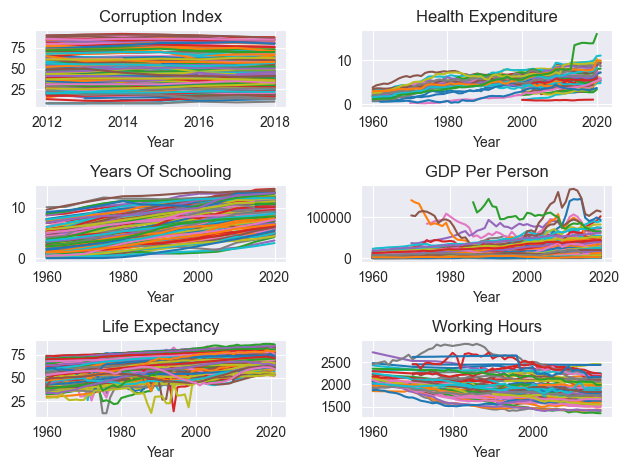

In [139]:
frames_len = len(data_frames)

cols = 2
rows= int(math.ceil(frames_len / cols))
 
fig, axes = plt.subplots(rows, cols, tight_layout = True)

count=0
for r in range(rows):
    for c in range(cols):
        if count >= frames_len:
            break
        ax = axes[r,c]
        data_frames[count].T.plot(ax = ax, legend = False)
        ax.set_title(titles[count])
        count += 1

## Build data table

In [140]:
year = 2015
data = pd.concat((f[year] for f in data_frames), axis=1, keys=titles)
data.dropna(inplace=True)
data

,Corruption Index,Health Expenditure,Years Of Schooling,GDP Per Person,Life Expectancy,Working Hours
Entity,,,,,,
Argentina,32.0,6.853,9.59,21197.787,76.7602,1691.5363
Australia,79.0,6.985,12.92,48712.190,82.6552,1747.0090
Austria,76.0,7.678,10.27,49618.703,81.1594,1598.8944
Belgium,77.0,8.265,11.36,42891.355,80.8898,1544.6100
Brazil,38.0,3.861,7.66,15077.577,74.3325,1709.4856
Bulgaria,41.0,4.148,10.71,17693.727,74.6325,1644.3853
Canada,83.0,7.591,12.83,46945.504,81.9246,1707.0730
Chile,70.0,4.878,10.49,23214.646,79.7460,1988.0000
China,37.0,2.986,8.51,12784.436,76.9771,2174.3501


# Task 2. Multivariance Analysis

## Covariation matrix

In [141]:
data.cov()

,Corruption Index,Health Expenditure,Years Of Schooling,GDP Per Person,Life Expectancy,Working Hours
Corruption Index,330.367347,28.280535,16.050757,2.521489e+05,45.825648,-2.604893e+03
Health Expenditure,28.280535,5.376944,1.692178,2.385855e+04,4.865854,-3.224082e+02
Years Of Schooling,16.050757,1.692178,2.386528,1.653838e+04,2.959775,-1.372508e+02
GDP Per Person,252148.859298,23858.546430,16538.383563,2.997813e+08,44642.157770,-2.544041e+06
Life Expectancy,45.825648,4.865854,2.959775,4.464216e+04,15.004454,-4.440115e+02
Working Hours,-2604.893296,-322.408213,-137.250831,-2.544041e+06,-444.011458,4.747745e+04


## Correlation matrix

<Axes: >

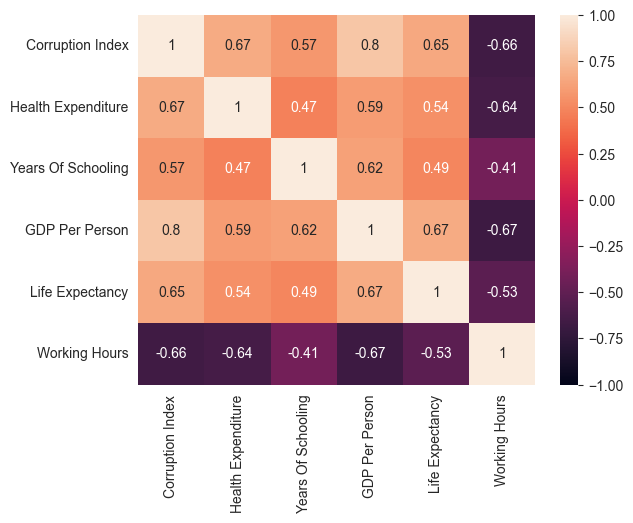

In [142]:
corr = data.corr()
sb.heatmap(corr, annot=True, vmin=-1, vmax=1)

## Principle components

<Axes: >

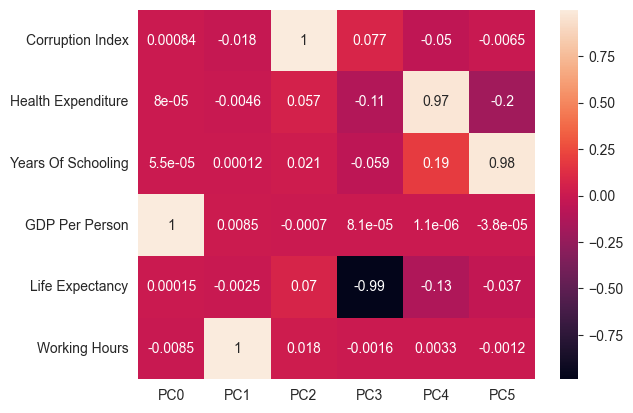

In [143]:
pca = PCA(n_components=data.shape[1], whiten=True)
pca.fit(data)

loadings = pd.DataFrame(pca.components_.T, columns=['PC%s' % _ for _ in range(len(data.columns))],
index=data.columns)

sb.heatmap(loadings, annot=True)

## Eigenvalues

In [144]:
eigvals = np.linalg.eigvals(corr)
eigvals = np.sort(eigvals)[::-1]
eigvals_df = pd.DataFrame(eigvals, columns=['Eigenvalues'], index=pd.RangeIndex(1, len(eigvals) + 1))
eigvals_df.index.name = 'Principal Components'
eigvals_df

,Eigenvalues
Principal Components,
1,4.016824
2,0.633483
3,0.473085
4,0.395298
5,0.302826
6,0.178484


## Scree plot

<Axes: xlabel='Principal Components', ylabel='Eigenvalues'>

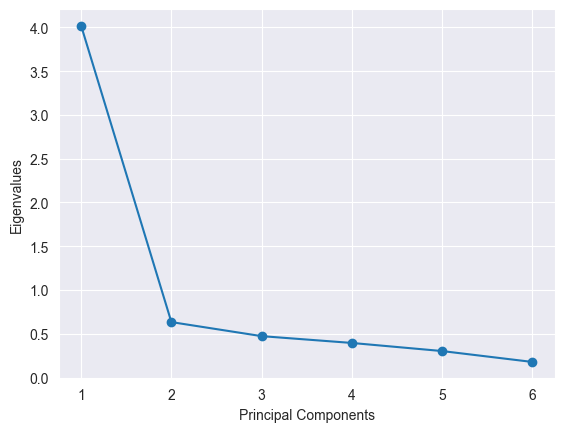

In [145]:
eigvals_df.plot(marker='o', ylabel='Eigenvalues', legend=False)